In [6]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [7]:
path = 'C:\\Users\\qandr_000\\Desktop\\Astro-Labs\\lab6\\optical-spectroscopy\\Frames-for-Use'
biases = []
for i in range(1,11):
    zeros = (8-len(str(i)))*'0'
    biases.append(fits.getdata(path+'\\tBias'+zeros+'{}.fit'.format(i) , ext=0).astype(np.int))
    
avg_bias = np.asarray(biases).mean(axis=0) #Creates an average bias frame to subtract from all measurements   

In [8]:
lamp_on  = []
lamp_off = []

sun_on  = []
sun_off = []

for i in range(11,16):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata(path+'\\t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(16,21):
    zeros = (8-len(str(i)))*'0'
    sun_off.append(fits.getdata(path+'\\t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(21,24):
    zeros = (8-len(str(i)))*'0'
    lamp_on.append(fits.getdata(path+'\\t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(24,27):
    zeros = (8-len(str(i)))*'0'
    lamp_off.append(fits.getdata(path+'\\t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))  

In [9]:
lamp_on_sub_bias = [lamp - avg_bias for lamp in lamp_on]
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off]
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]

avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0)
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)

In [10]:
lamp_corrected = [lamp_on - avg_lamp_off for lamp_on in lamp_on_sub_bias]
sun_corrected  = [sun_on - avg_sun_off for sun_on in sun_on_sub_bias]

avg_lamp = np.asarray(lamp_corrected).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)

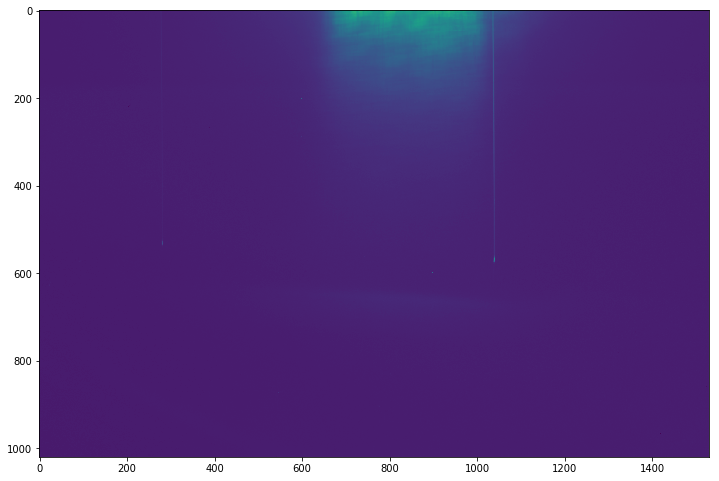

In [11]:
plt.imshow(avg_lamp)
plt.show()

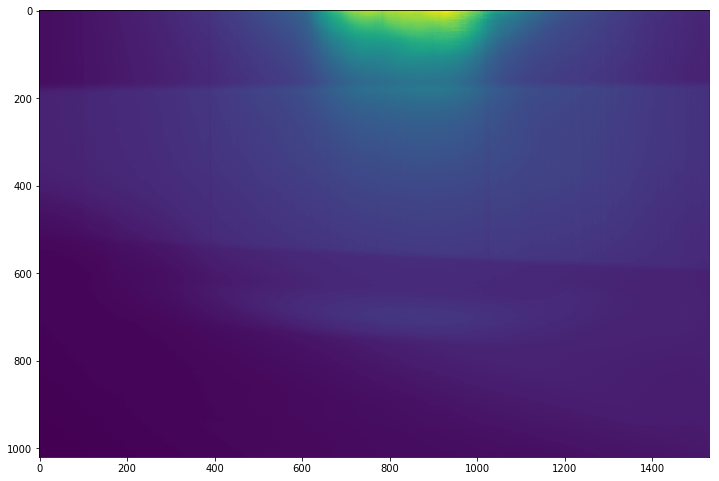

In [12]:
plt.imshow(avg_sun)
plt.show()

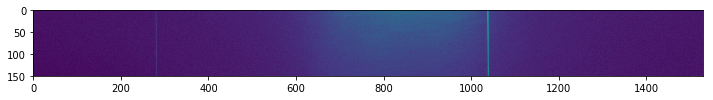

In [13]:
plt.imshow(avg_lamp[300:450,:])

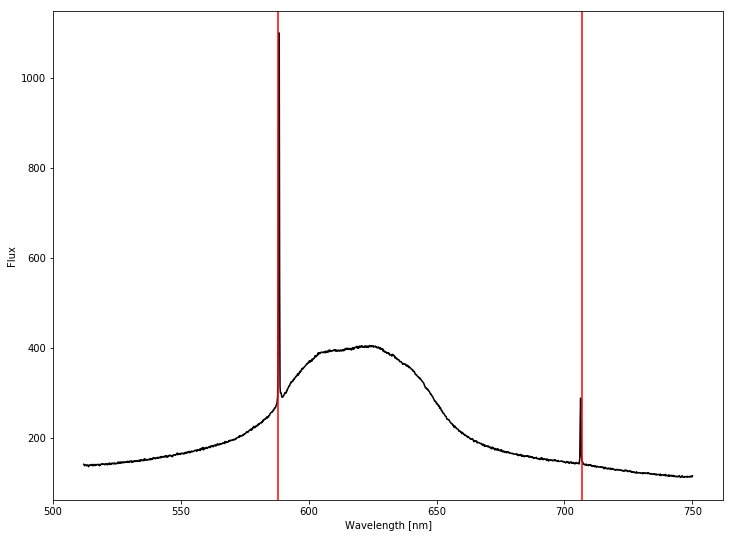

In [37]:
lamp_good = np.asarray(avg_lamp[300:450,:]).mean(axis=0) #Averages the value along each column in the region that our spectra look relatively free of contamination.
sun_good  = np.asarray(avg_sun[300:450,:]).mean(axis=0)
lamp_good_flipped = np.flip(np.arange(len(lamp_good)),0) #np.flip(~~~) reverses the array inside it.
sun_good_flipped = np.flip(np.arange(len(sun_good)),0)

stretch = 0.1557 #The value that the graph has to "stretch" to fit data.
shift = 512.0 #The value added to the graph to fit data.

Helium = [588, 707]

plt.plot((lamp_good_flipped)*stretch+shift, lamp_good, 'k-')

for line in Krypton:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.show()